# **DATA SCIENCE PROJECT PHASE-2**

G**ROUP-8**

TEAM MEMBERS:

Poojitha Reddy Bommu

Pavani Daggula

Praveen Gurlinka

SAI SUPRAJA RAVI KUMAR


1) Use the same dataset from the Semester Project Part 1 and perform classification or regression based on your dataset. Keep some test data to report the performances of your selected models on only train data.  Perform visualization of your model performances using apt metrics and charts (ex: MSE bar plots of all the models to identify best models). Please use markdowns to the best use to make code easy to understand, comment important parts, insights, brief descriptions of the steps involved.

Use 4 modeling techniques:
•	Linear regression/classification

•	KNN

•	Random Forest

•	SVM with linear kernel and SVM with nonlinear kernel


•	Another one that you can choose. Deep Learning is not allowed.

In [1]:
#Importing necessary libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#calculating MSE
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error



from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor



from sklearn.model_selection import GridSearchCV





In [3]:
#Loading the dataset
Bike_sharing_df = pd.read_csv("/content/Group_8_clean_data.csv")

In [7]:
#Printing the column names
for i in Bike_sharing_df.columns:
  print(i)

Unnamed: 0
season
year
month
hour
holiday
weekday
workingday
weathersit
temp
atemp
humidity
windspeed
casual
registered
Count
total riders


In [8]:
# Printing theh first five instances from dataset
Bike_sharing_df.head()

,Unnamed: 0,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,Count,total riders
0,0,winter,2011,jan,0,0,saturday,Holiday,1,0.24,0.2879,0.81,0.0,3,13,16,16
1,1,winter,2011,jan,1,0,saturday,Holiday,1,0.22,0.2727,0.80,0.0,8,32,40,40
2,2,winter,2011,jan,2,0,saturday,Holiday,1,0.22,0.2727,0.80,0.0,5,27,32,32
3,3,winter,2011,jan,3,0,saturday,Holiday,1,0.24,0.2879,0.75,0.0,3,10,13,13
4,4,winter,2011,jan,4,0,saturday,Holiday,1,0.24,0.2879,0.75,0.0,0,1,1,1


In [9]:
Bike_sharing_df.describe()

,Unnamed: 0,year,hour,holiday,weathersit,temp,atemp,humidity,windspeed,casual,registered,Count,total riders
count,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000
mean,8688.742476,2011.502561,11.547505,0.028774,1.425332,0.496993,0.475780,0.627216,0.190108,35.680267,153.803649,189.483916,189.483916
std,5017.170830,0.500008,6.914438,0.167175,0.639377,0.192553,0.171849,0.192935,0.122343,49.306423,151.357913,181.387645,181.387645
min,0.000000,2011.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,4344.000000,2011.000000,6.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,40.000000
50%,8689.000000,2012.000000,12.000000,0.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,142.000000
75%,13033.000000,2012.000000,18.000000,0.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,281.000000
max,17378.000000,2012.000000,23.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,977.000000


In [4]:
#Dropping the unnecsessary columns
Bike_sharing_df= Bike_sharing_df.drop("Unnamed: 0",axis=1)
Bike_sharing_df=Bike_sharing_df.drop("total riders",axis=1)

In [7]:
#After dropping
Bike_sharing_df

,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,Count
0,winter,2011,jan,0,0,saturday,Holiday,1,0.24,0.2879,0.81,0.0000,3,13,16
1,winter,2011,jan,1,0,saturday,Holiday,1,0.22,0.2727,0.80,0.0000,8,32,40
2,winter,2011,jan,2,0,saturday,Holiday,1,0.22,0.2727,0.80,0.0000,5,27,32
3,winter,2011,jan,3,0,saturday,Holiday,1,0.24,0.2879,0.75,0.0000,3,10,13
4,winter,2011,jan,4,0,saturday,Holiday,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17372,winter,2012,dec,19,0,monday,WorkingDay,2,0.26,0.2576,0.60,0.1642,11,108,119
17373,winter,2012,dec,20,0,monday,WorkingDay,2,0.26,0.2576,0.60,0.1642,8,81,89
17374,winter,2012,dec,21,0,monday,WorkingDay,1,0.26,0.2576,0.60,0.1642,7,83,90
17375,winter,2012,dec,22,0,monday,WorkingDay,1,0.26,0.2727,0.56,0.1343,13,48,61


CHanging categorical variable(s) into dummy/indicator variables.

In [8]:
#Change categorical into dummies
seasons = pd.get_dummies(Bike_sharing_df['season'], drop_first=True)
seasons

,spring,summer,winter
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
17372,0,0,1
17373,0,0,1
17374,0,0,1
17375,0,0,1


In [9]:
weekday = pd.get_dummies(Bike_sharing_df['weekday'], drop_first=True)

weekday

,monday,saturday,sunday,thursday,tuesday,wednessday
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0
...,...,...,...,...,...,...
17372,1,0,0,0,0,0
17373,1,0,0,0,0,0
17374,1,0,0,0,0,0
17375,1,0,0,0,0,0


In [10]:
month = pd.get_dummies(Bike_sharing_df['month'], drop_first=True)
month

,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
17372,0,1,0,0,0,0,0,0,0,0,0
17373,0,1,0,0,0,0,0,0,0,0,0
17374,0,1,0,0,0,0,0,0,0,0,0
17375,0,1,0,0,0,0,0,0,0,0,0


In [11]:
workingday =  pd.get_dummies(Bike_sharing_df['workingday'], drop_first=True)
workingday

,WorkingDay
0,0
1,0
2,0
3,0
4,0
...,...
17372,1
17373,1
17374,1
17375,1


In [12]:
Bike_sharing_df['year'] = Bike_sharing_df['year'].map({2011 : 0 , 2012:1})


In [13]:
bike_sharing_df= pd.concat([Bike_sharing_df,seasons,workingday,weekday,month],axis=1)
bike_sharing_df

,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,winter,0,jan,0,0,saturday,Holiday,1,0.24,0.2879,...,0,0,1,0,0,0,0,0,0,0
1,winter,0,jan,1,0,saturday,Holiday,1,0.22,0.2727,...,0,0,1,0,0,0,0,0,0,0
2,winter,0,jan,2,0,saturday,Holiday,1,0.22,0.2727,...,0,0,1,0,0,0,0,0,0,0
3,winter,0,jan,3,0,saturday,Holiday,1,0.24,0.2879,...,0,0,1,0,0,0,0,0,0,0
4,winter,0,jan,4,0,saturday,Holiday,1,0.24,0.2879,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17372,winter,1,dec,19,0,monday,WorkingDay,2,0.26,0.2576,...,1,0,0,0,0,0,0,0,0,0
17373,winter,1,dec,20,0,monday,WorkingDay,2,0.26,0.2576,...,1,0,0,0,0,0,0,0,0,0
17374,winter,1,dec,21,0,monday,WorkingDay,1,0.26,0.2576,...,1,0,0,0,0,0,0,0,0,0
17375,winter,1,dec,22,0,monday,WorkingDay,1,0.26,0.2727,...,1,0,0,0,0,0,0,0,0,0


In [14]:
bike_sharing_df=bike_sharing_df.drop("season",axis=1)
bike_sharing_df=bike_sharing_df.drop("month",axis=1)
bike_sharing_df=bike_sharing_df.drop( "weekday",axis=1)
bike_sharing_df=bike_sharing_df.drop("workingday",axis=1)




In [15]:
#Our dataset
bike_sharing_df

,year,hour,holiday,weathersit,temp,atemp,humidity,windspeed,casual,registered,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,1,0.24,0.2879,0.81,0.0000,3,13,...,0,0,1,0,0,0,0,0,0,0
1,0,1,0,1,0.22,0.2727,0.80,0.0000,8,32,...,0,0,1,0,0,0,0,0,0,0
2,0,2,0,1,0.22,0.2727,0.80,0.0000,5,27,...,0,0,1,0,0,0,0,0,0,0
3,0,3,0,1,0.24,0.2879,0.75,0.0000,3,10,...,0,0,1,0,0,0,0,0,0,0
4,0,4,0,1,0.24,0.2879,0.75,0.0000,0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17372,1,19,0,2,0.26,0.2576,0.60,0.1642,11,108,...,1,0,0,0,0,0,0,0,0,0
17373,1,20,0,2,0.26,0.2576,0.60,0.1642,8,81,...,1,0,0,0,0,0,0,0,0,0
17374,1,21,0,1,0.26,0.2576,0.60,0.1642,7,83,...,1,0,0,0,0,0,0,0,0,0
17375,1,22,0,1,0.26,0.2727,0.56,0.1343,13,48,...,1,0,0,0,0,0,0,0,0,0


In [16]:
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17377 entries, 0 to 17376
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        17377 non-null  int64  
 1   hour        17377 non-null  int64  
 2   holiday     17377 non-null  int64  
 3   weathersit  17377 non-null  int64  
 4   temp        17377 non-null  float64
 5   atemp       17377 non-null  float64
 6   humidity    17377 non-null  float64
 7   windspeed   17377 non-null  float64
 8   casual      17377 non-null  int64  
 9   registered  17377 non-null  int64  
 10  Count       17377 non-null  int64  
 11  spring      17377 non-null  uint8  
 12  summer      17377 non-null  uint8  
 13  winter      17377 non-null  uint8  
 14  WorkingDay  17377 non-null  uint8  
 15  monday      17377 non-null  uint8  
 16  saturday    17377 non-null  uint8  
 17  sunday      17377 non-null  uint8  
 18  thursday    17377 non-null  uint8  
 19  tuesday     17377 non-nul

**Splitting the data**

In [18]:
#Consider y the 'count' as target variable
y = bike_sharing_df['Count']

#x as features
x = bike_sharing_df.drop('Count', axis=1)

In [20]:
#Prinitng the x
x

,year,hour,holiday,weathersit,temp,atemp,humidity,windspeed,casual,registered,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,1,0.24,0.2879,0.81,0.0000,3,13,...,0,0,1,0,0,0,0,0,0,0
1,0,1,0,1,0.22,0.2727,0.80,0.0000,8,32,...,0,0,1,0,0,0,0,0,0,0
2,0,2,0,1,0.22,0.2727,0.80,0.0000,5,27,...,0,0,1,0,0,0,0,0,0,0
3,0,3,0,1,0.24,0.2879,0.75,0.0000,3,10,...,0,0,1,0,0,0,0,0,0,0
4,0,4,0,1,0.24,0.2879,0.75,0.0000,0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17372,1,19,0,2,0.26,0.2576,0.60,0.1642,11,108,...,1,0,0,0,0,0,0,0,0,0
17373,1,20,0,2,0.26,0.2576,0.60,0.1642,8,81,...,1,0,0,0,0,0,0,0,0,0
17374,1,21,0,1,0.26,0.2576,0.60,0.1642,7,83,...,1,0,0,0,0,0,0,0,0,0
17375,1,22,0,1,0.26,0.2727,0.56,0.1343,13,48,...,1,0,0,0,0,0,0,0,0,0


In [21]:
#Prinitng the y
y

0         16
1         40
2         32
3         13
4          1
        ... 
17372    119
17373     89
17374     90
17375     61
17376     49
Name: Count, Length: 17377, dtype: int64

In [23]:
#splitting the data into test and train data with test size of 0.2 and using random state of 42

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [24]:
# Convert feature names to strings for both X_train and X_test
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

In [25]:
#Scaling of Data Using StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Y_train_scaled = scaler.fit_transform(Y_train.values.reshape(-1, 1))
Y_test_scaled = scaler.fit_transform(Y_test.values.reshape(-1,1))


In [26]:
X_train_scaled

array([[-1.00381997, -0.08238262, -0.17278968, ..., -0.29788835,
        -0.30625447, -0.2986034 ],
       [-1.00381997,  0.78420898, -0.17278968, ..., -0.29788835,
         3.26525845, -0.2986034 ],
       [ 0.99619457,  0.35091318, -0.17278968, ..., -0.29788835,
        -0.30625447, -0.2986034 ],
       ...,
       [-1.00381997,  0.06204931, -0.17278968, ..., -0.29788835,
        -0.30625447, -0.2986034 ],
       [-1.00381997, -0.66011036, -0.17278968, ..., -0.29788835,
        -0.30625447, -0.2986034 ],
       [ 0.99619457, -0.22681455, -0.17278968, ..., -0.29788835,
         3.26525845, -0.2986034 ]])

In [27]:
Y_train_scaled

array([[-0.6488542 ],
       [ 2.1563656 ],
       [-0.16217864],
       ...,
       [-0.00906723],
       [-0.49574278],
       [ 0.1877903 ]])

# **Applying the machine learning models**

# **1. Linear Regression**


It is a statistical method that predicts the relationship between two variables. It's a commonly used method of predictive analysis. To find the best-fit linear relationship that describes the pattern or trend in the data, a Statistical Linear regression method is used between a dependent variable and one or more independent variables. It predicts continuous value. example: y = mx + b Here:

x = independent variable

y = dependent variable

b = bias

m = slope

In [28]:
#creating linear regression model


lin_reg = LinearRegression()

lin_reg.fit(X_train_scaled, Y_train_scaled)


LinearRegression()

In [29]:
#coefficients
print("coefficients: ",lin_reg.coef_)
#intercept
print("intercept:",lin_reg.intercept_)

coefficients:  [[ 1.73006649e-16  8.88178420e-16  7.51150497e-03 -1.45267269e-16
  -9.28655193e-16  8.18894902e-16  2.90337945e-17  2.50067612e-16
   2.73495954e-01  8.33585767e-01  3.29105018e-17  2.15080400e-16
  -1.47340885e-16  2.08687195e-02  7.44962630e-17  1.57516617e-02
   1.57808758e-02 -1.12757026e-16  5.72458747e-17  6.24500451e-17
  -1.07552856e-16 -2.42861287e-17 -6.41847686e-17 -9.36750677e-17
  -8.06646416e-17 -6.67868538e-17 -1.28369537e-16  6.15826834e-17
  -1.99493200e-16  1.90819582e-16  4.06846865e-17]]
intercept: [-1.75458074e-17]


In [30]:
#predicting on test data
y_pred_linreg=lin_reg.predict(X_test_scaled)
y_pred_linreg

array([[ 0.77836289],
       [ 2.96020051],
       [-0.03094028],
       ...,
       [-0.50667931],
       [ 0.45026701],
       [ 0.5760371 ]])

In [34]:
#calculating MSE
mse_train_linreg = mean_squared_error(Y_train_scaled, lin_reg.predict(X_train_scaled))
mse_test_linreg = mean_squared_error(Y_test_scaled, lin_reg.predict(X_test_scaled))
print('The MSE for training data',mse_train_linreg)
print('the MSE for test data', mse_test_linreg)

The MSE for training data 1.8713013621943628e-30
the MSE for test data 0.0027843554445992845


In [39]:
# Evaluate

print("Mean Absolute Error for Linear regression  on test data :", metrics.mean_absolute_error(Y_test_scaled, y_pred_linreg))
mae_test_linreg=mean_absolute_error(Y_test_scaled, y_pred_linreg)
print("Mean Squared Error for linear regression on test data  :", metrics.mean_squared_error(Y_test_scaled, y_pred_linreg))


Mean Absolute Error for Linear regression  on test data : 0.036298145692577895
Mean Squared Error for linear regression on test data  : 0.0027843554445992845


MSE measures the average squared difference between the predicted values and the actual values. Lower MSE values indicate better model performance.

R-squared represents the proportion of the variance in the dependent variable that is predictable from the independent variables.

In [37]:
# Evaluate the model using R-squared
from sklearn.metrics import r2_score
r2 = r2_score(Y_test_scaled, y_pred_linreg)
print("R2 Score:", r2)

R2 Score: 0.9972156445554007


# **Observation:**
The observed Mean Absolute Error (MAE) of 0.0363 and Mean Squared Error (MSE) of 0.00278 on the test data indicate a high accuracy and precision of the linear regression model. Additionally, the R2 score of 0.9972 suggests its robust predictive performance and strong fit to the data.

# ***K-Nearest Neighbors Algorithm***


K-Nearest Neighbors (KNN) is a flexible algorithm in machine learning that predicts outcomes by considering the majority class or average of the k-closest data points in the feature space. Its functioning involves distance computations, selection of the k-closest neighbors, and assignment of labels or values based on the neighbors. Despite its versatility for classification and regression, the success of KNN depends on thoughtful selection of the optimal 'k' value and appropriate feature scaling.

In [42]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, Y_train_scaled)

KNeighborsRegressor()

In [43]:
X_train.shape

(13901, 31)

In [44]:
y_pred_knn_train=knn_model.predict(X_train_scaled)
y_pred_knn_train

array([[-0.67619552],
       [ 1.78889821],
       [-0.27591854],
       ...,
       [-0.10421503],
       [-0.56792388],
       [ 0.27090793]])

In [45]:
y_pred_knn_test= knn_model.predict(X_test_scaled)
y_pred_knn_test

array([[ 0.22606816],
       [ 2.68678727],
       [-0.17420882],
       ...,
       [-0.66307168],
       [ 0.4087082 ],
       [ 0.43933048]])

In [51]:
#calculating MSE

mse_train_knn = mean_squared_error(Y_train_scaled, y_pred_knn_train)
mse_test_knn = mean_squared_error(Y_test_scaled, y_pred_knn_test)
print("The MSE on train data for KNN is",mse_train_knn)
print("The MSE  on test data for KNN :",mse_test_knn)

The MSE on train data for KNN is 0.061090074520844126
The MSE  on test data for KNN : 0.1092058482100309


In [53]:
# Evaluate on test data

mae_test_knn=mean_absolute_error(Y_test_scaled, y_pred_knn_test)
print("Mean Absolute Error on test data  for KNN:", metrics.mean_absolute_error(Y_test_scaled, y_pred_knn_test))
print("Mean Squared Error on test data  for KNN:", mean_squared_error(Y_test_scaled, y_pred_knn_test))
r2_score_knn=np.sqrt(metrics.mean_squared_error(Y_test_scaled, y_pred_knn_test))
print("Root Mean Squared Error for KNN :", np.sqrt(metrics.mean_squared_error(Y_test_scaled, y_pred_knn_test)))

Mean Absolute Error on test data  for KNN: 0.2360867479099252
Mean Squared Error on test data  for KNN: 0.1092058482100309
Root Mean Squared Error for KNN : 0.3304630814630144


**Observation:**

Mean Absolute Error (MAE) of 0.2361 and Mean Squared Error (MSE) of 0.1092 for K-Nearest Neighbors (KNN) on the test data suggest that, on average, the model's predictions deviate by approximately 0.2361 units and the squared deviations amount to 0.1092.

In [54]:
K_values = []
mse_values = []
mae_values = []
rmse_values = []
r2_scores_values = []

for k in range(1, 50, 2):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train_scaled, Y_train_scaled)
    y_pred_knn_test = model.predict(X_test_scaled)

    mse_value = mean_squared_error(Y_test_scaled, y_pred_knn_test)
    mae_value = mean_absolute_error(Y_test_scaled, y_pred_knn_test)
    rmse_value = np.sqrt(mse_value)
    r2_score_value = r2_score(Y_test_scaled, y_pred_knn_test)

    K_values.append(k)
    mse_values.append(mse_value)
    mae_values.append(mae_value)
    rmse_values.append(rmse_value)
    r2_scores_values.append(r2_score_value)

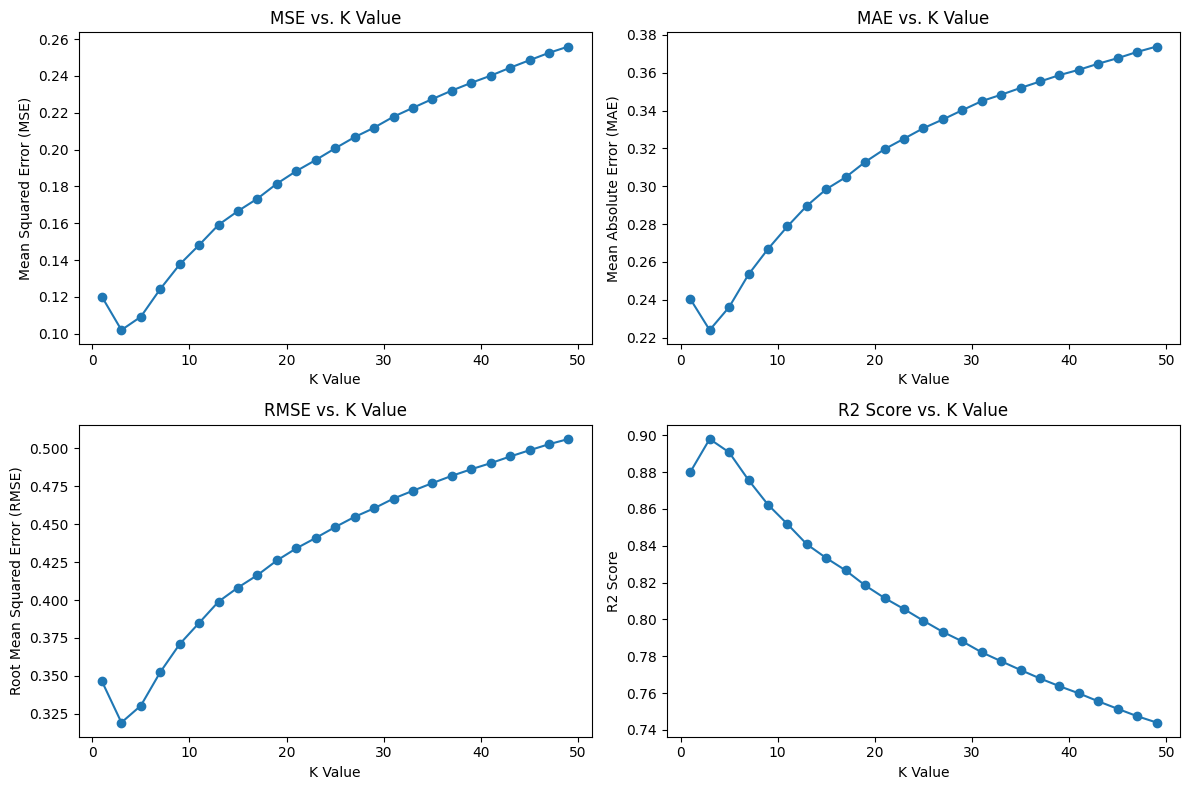

In [55]:
# Plotting the results
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(K_values, mse_values, marker='o')
plt.title('MSE vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Squared Error (MSE)')

plt.subplot(2, 2, 2)
plt.plot(K_values, mae_values, marker='o')
plt.title('MAE vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Absolute Error (MAE)')

plt.subplot(2, 2, 3)
plt.plot(K_values, rmse_values, marker='o')
plt.title('RMSE vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Root Mean Squared Error (RMSE)')

plt.subplot(2, 2, 4)
plt.plot(K_values, r2_scores_values, marker='o')
plt.title('R2 Score vs. K Value')
plt.xlabel('K Value')
plt.ylabel('R2 Score')

plt.tight_layout()
plt.show()

The above plots represns the results obtained. They are plotted for different metrics obtained with k values. From the figures we can observe that there in an increase in error with the K value but intially there is a drop but the metrics increase with the k values.

In [44]:
print("Mse: ",mse_values)

Mse:  [0.12001680476343732, 0.10198186281444814, 0.1092058482100309, 0.12429087718873666, 0.13764288044657275, 0.14819440175472212, 0.15918093569326877, 0.16664869131648416, 0.1733904883929987, 0.1815039688466587, 0.18836417645395392, 0.19436359149475663, 0.20072089736975032, 0.2067765385087052, 0.21192313358190146, 0.21786913333062286, 0.22270687649412316, 0.22747616393035347, 0.23206396796733272, 0.2362723004909304, 0.24016517768501772, 0.24449485220711673, 0.24857365132292464, 0.2525701077061645, 0.25600809335876445]


In [45]:
print("Minumum Mse:",min(mse_values) )
K=K_values[mse_values.index(min(mse_values))]
print('Optimal k value:',K)

Minumum Mse: 0.10198186281444814
Optimal k value: 3


The optimal value of k o=is 3.

# **RANDOM FOREST**

Random Forest stands as an ensemble learning method, building numerous decision trees during training and deriving the mode or mean prediction from these trees for classification or regression purposes. It injects variability by training each tree on a random subset of features and bootstrapped samples from the dataset, fostering resilience and mitigating overfitting. The final prediction is a collective result, making Random Forest a powerful and versatile model known for its high accuracy and ability to handle complex relationships in data.

In [56]:

from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(max_depth = 5,
                                n_estimators = 50,
                                bootstrap = True,
                               random_state=42)
forest.fit(X_train_scaled, Y_train_scaled)

<ipython-input-56-2210ceb508c2>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train_scaled, Y_train_scaled)


RandomForestRegressor(max_depth=5, n_estimators=50, random_state=42)

In [57]:
y_pred = forest.predict(X_test_scaled)

y_pred

array([ 0.75605654,  2.957164  ,  0.05154327, ..., -0.4480359 ,
        0.51093825,  0.56798981])

In [58]:
#caluculating the MSE and MAE errors
mse_train_forest = mean_squared_error(Y_train_scaled, forest.predict(X_train_scaled))
mse_test_forest = mean_squared_error(Y_test_scaled, forest.predict(X_test_scaled))
print("Mean Squared Error  for random forest on training data",mse_train_forest)
print("Mean Squared Error  for random forest on testing data",mse_test_forest)

Mean Squared Error  for random forest on training data 0.005873120325799618
Mean Squared Error  for random forest on testing data 0.009872647095790022


In [59]:
#MAE and R2 score for testing data
mae_test_forest=mean_absolute_error(Y_test_scaled, y_pred)
print("Mean Absolute Error for random forest on testing data:", metrics.mean_absolute_error(Y_test_scaled,forest.predict(X_test_scaled)))
r2_score_forest=np.sqrt(metrics.mean_squared_error(Y_test_scaled, y_pred))
print("Root Mean Squared Error: fro random forest on test data ", np.sqrt(metrics.mean_squared_error(Y_test_scaled, forest.predict(X_test_scaled))))

Mean Absolute Error for random forest on testing data: 0.06579904078463528
Root Mean Squared Error: fro random forest on test data  0.09936119512058025


**Observation:**


Mean Squared Error (MSE) of 0.0099 for Random Forest and the  Mean Absolute Error (MAE) of 0.0658 suggests an average absolute deviation of approximately 0.0658 units, providing a measure of the model's overall accuracy. Additionally, the Root Mean Squared Error (RMSE) of 0.0994 offers a comprehensive assessment, considering both the magnitude and direction of errors.

**SVM LINEAR**

Linear Support Vector Machines (SVM) function by identifying the most effective hyperplane for class separation in a dataset with linear separability. Employing a linear decision boundary, SVM strives to maximize the margin, defined as the distance between the hyperplane and the closest data points of each class. There are various kernels for svm like kinear,rbf,polynomial, but fro linear svm model we use the linear kernel.

In [60]:
#Using SVM Linear
from sklearn.svm import SVR

linear_svm = SVR(kernel='linear')
linear_svm.fit(X_train_scaled, Y_train_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

In [61]:
#caluculating the MSE and MAE errors
mse_train_linear= mean_squared_error(Y_train_scaled,linear_svm.predict(X_train_scaled))
mse_test_linear = mean_squared_error(Y_test_scaled, linear_svm.predict(X_test_scaled))
print("Mean Squared Error on training data:",mse_train_linear)
print("Mean Squared Error on testing data:",mse_test_linear)

Mean Squared Error on training data: 0.002819099104583584
Mean Squared Error on testing data: 0.0052104697360385414


In [62]:
mae_test_linear = mean_absolute_error(Y_test_scaled, linear_svm.predict(X_test_scaled))
#MAE and R2 score for testing data
# Print Mean Absolute Error
print("Mean Absolute Error on testdata for linear svm:", mae_test_linear)
print("Mean Squared error on test data for linear svm:", mean_squared_error(Y_test_scaled,linear_svm.predict(X_test_scaled)))
r2_score_linear=np.sqrt(metrics.mean_squared_error(Y_test_scaled,linear_svm.predict(X_test_scaled) ))
print("R2 Score:", np.sqrt(metrics.mean_squared_error(Y_test_scaled,linear_svm.predict(X_test_scaled) )))

Mean Absolute Error on testdata for linear svm: 0.057747194175425245
Mean Squared error on test data for linear svm: 0.0052104697360385414
R2 Score: 0.0721835835632905


# **SVM Non Linear**

For non linear svm we use rbf kernel

In [64]:
#SVM Non Linear
#Using SVM Non-linear
nonlinear_svm = SVR(kernel='rbf', gamma='auto')
nonlinear_svm.fit(X_train_scaled, Y_train_scaled)

y_pred=nonlinear_svm.predict(X_train_scaled)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([-0.72547385,  2.19896583, -0.2366816 , ..., -0.04596457,
       -0.54138726,  0.09335229])

In [66]:
mse_train_nonlinear= mean_squared_error(Y_train_scaled,nonlinear_svm.predict(X_train_scaled))
mse_test_nonlinear = mean_squared_error(Y_test_scaled, nonlinear_svm.predict(X_test_scaled))
print("Mean Squared Error on training data: fro non linear svm",mse_train_nonlinear)
print("Mean Squared Error on testing data for non linear svm:",mse_test_nonlinear)

Mean Squared Error on training data: fro non linear svm 0.003242125564074942
Mean Squared Error on testing data for non linear svm: 0.007642703704877967


In [68]:
mae_test_nonlinear = mean_absolute_error(Y_test_scaled, nonlinear_svm.predict(X_test_scaled))

# Print Mean Absolute Error
print("Mean Absolute Error on test data for non linear svm :", mae_test_nonlinear)
print("Mean Squared error on train data for non linear svm :", mean_squared_error(Y_test_scaled,nonlinear_svm.predict(X_test_scaled)))
r2_score_nonlinear=np.sqrt(metrics.mean_squared_error(Y_test_scaled,nonlinear_svm.predict(X_test_scaled) ))
print("R2 Score:", np.sqrt(metrics.mean_squared_error(Y_test_scaled,nonlinear_svm.predict(X_test_scaled) )))

Mean Absolute Error on test data for non linear svm : 0.07235269809767617
Mean Squared error on train data for non linear svm : 0.007642703704877967
R2 Score: 0.08742255832951794


**Observation:**

The mean absolute error on test data for non linear svm is obseraved as  0.07235 and the mean squared error on train data for non linear svm : 0.00764.

# **Decision Trees**


Decision Trees serve as a foundational element in ensemble techniques such as Random Forests and Gradient Boosted Trees, playing a crucial role in the creation of potent and resilient machine learning models. It operates by recursively partitioning the input data into subsets based on the values of different features, creating a tree-like structure where each internal node represents a decision based on a specific feature, and each leaf node represents the predicted outcome.

In [69]:
#Decision Tree
from sklearn import tree
tree=tree.DecisionTreeRegressor(max_depth=5,
                                min_samples_split=500)
tree.fit(X_train_scaled,Y_train_scaled)

DecisionTreeRegressor(max_depth=5, min_samples_split=500)

In [70]:
y_pred_dt=tree.predict(X_test_scaled)
y_pred_dt

array([ 0.97296878,  3.14818656,  0.12526098, ..., -0.42003756,
        0.76373571,  0.42599433])

In [74]:
mse_train_tree= mean_squared_error(Y_train_scaled, tree.predict(X_train_scaled))
mse_test_tree = mean_squared_error(Y_test_scaled, tree.predict(X_test_scaled))
print("The MSE on train data for  decision tree",mse_train_tree)
print("The MSE on test data for decision tree",  mse_test_tree)

The MSE on train data for  decision tree 0.022007290285956285
The MSE on test data for decision tree 0.025900215246878827


In [75]:
print("Mean Squared error on test  data for decision. tree:", mean_squared_error(Y_test_scaled,y_pred_dt))
mae_test_tree=mean_absolute_error(Y_test_scaled,y_pred_dt)

print("Mean Absolute error on  test data decison tree:", mae_test_tree)
r2_score_tree=np.sqrt(metrics.mean_squared_error(Y_test_scaled, y_pred_dt))

print("R2 Score:", np.sqrt(metrics.mean_squared_error(Y_test_scaled, y_pred_dt)))

Mean Squared error on test  data for decision. tree: 0.025900215246878827
Mean Absolute error on  test data decison tree: 0.1004911283135453
R2 Score: 0.16093543813243505


# Comparing the MSE values for  all the models applied

In [76]:
#Displaying the MSE values
mse_values = [mse_test_linreg, mse_test_knn, mse_test_forest,mse_test_linear,mse_test_nonlinear,mse_test_tree]
mae_values=[mae_test_linreg,mae_test_knn,mae_test_forest,mae_test_linear,mse_test_nonlinear,mae_test_tree]
r2_scores_values=[r2_score_linreg,r2_score_knn,r2_score_forest,r2_score_linear,r2_score_nonlinear,r2_score_tree]

model_names = ["Linear Regression", "KNN","Random forest","SVM Linear","SVM NonLinear","Decision Tree"]
from prettytable import PrettyTable

# Assuming you have the mean squared error values in 'mse_values' and model names in 'model_names'

# Create a PrettyTable to display the MSE values
table = PrettyTable()
table.field_names = ["Model", "Mean Squared Error","Mean Absolute error","R2 score"]

for model, mse, mae, r2 in zip(model_names, mse_values, mae_values, r2_scores_values):
    table.add_row([model, format(mse, '.4f'), format(mae, '.4f'), format(r2, '.4f')])

# Print the table
print(table)

+-------------------+--------------------+---------------------+----------+
|       Model       | Mean Squared Error | Mean Absolute error | R2 score |
+-------------------+--------------------+---------------------+----------+
| Linear Regression |       0.0028       |        0.0363       |  0.0528  |
|        KNN        |       0.1092       |        0.2361       |  0.3305  |
|   Random forest   |       0.0099       |        0.0658       |  0.0994  |
|     SVM Linear    |       0.0052       |        0.0577       |  0.0722  |
|   SVM NonLinear   |       0.0076       |        0.0076       |  0.0874  |
|   Decision Tree   |       0.0259       |        0.1005       |  0.1609  |
+-------------------+--------------------+---------------------+----------+


**Observation:**


With the lowest Mean Squared Error (MSE) of 0.0028 and Mean Absolute Error (MAE) of 0.0363, linear regression beats other models in terms of performance measures, suggesting better predictive accuracy. Even though Random Forest and KNN have larger mistake rates, they are able to capture more intricate associations. Though reasonable, Decision Tree lags behind in precision when compared to Linear SVM and Nonlinear SVM. When accuracy and simplicity are balanced, linear regression is the best fit model for this dataset.



# Visualizations.

**Plotting the bar plots for obtained mean sqaured error (MSE) values from all modela applied  on  training data**

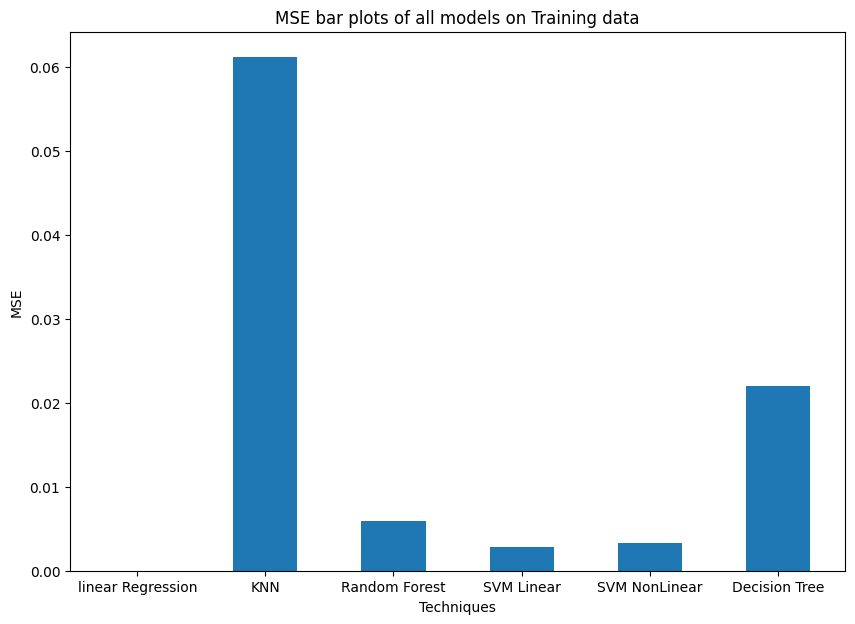

In [77]:
mse_train=[mse_train_linreg,mse_train_knn,mse_train_forest,mse_train_linear,mse_train_nonlinear,mse_train_tree]
mse_test=[mse_test_linreg,mse_test_knn,mse_train_forest,mse_test_linear,mse_test_nonlinear,mse_test_tree]

labels=['linear Regression','KNN','Random Forest','SVM Linear','SVM NonLinear','Decision Tree']



fig = plt.figure(figsize =(10, 7))

plt.bar(labels,mse_train,width=0.5)

plt.xlabel("Techniques")
plt.ylabel("MSE")
plt.title("MSE bar plots of all models on Training data")

plt.show()

**Plotting the bar plots for obtained mean sqaured error (MSE) values from all modela applied  on  testing  data**

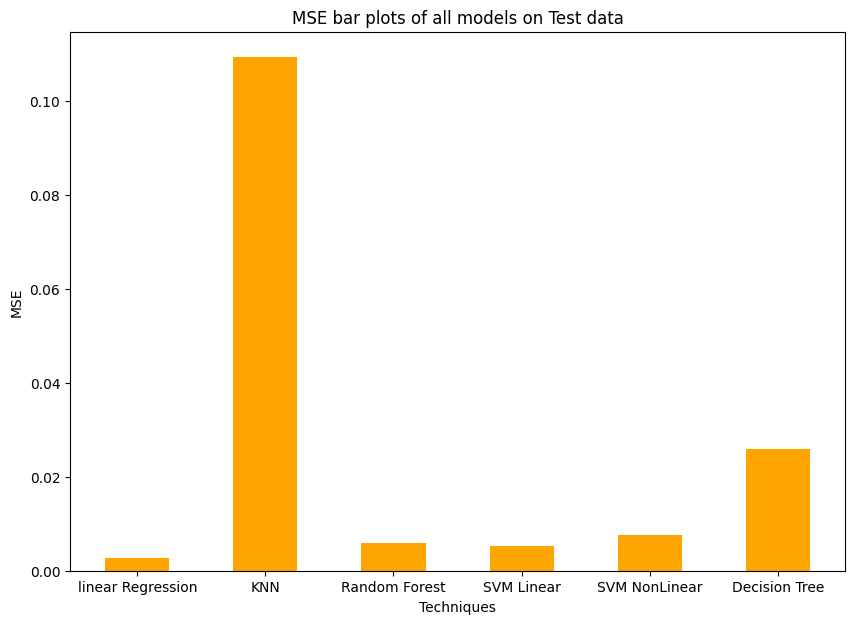

In [78]:
fig = plt.figure(figsize =(10, 7))

plt.bar(labels,mse_test,width=0.5,color='orange')

plt.xlabel("Techniques")
plt.ylabel("MSE")
plt.title("MSE bar plots of all models on Test data")

plt.show()

**Observation:**


From the above bar plots we observe that linear regression has the elast mean squared error values when compared to other models. The best model  obatined is linear regression

# **Hyperparameter Tuning**


Hyperparameter tuning is a vital process in machine learning, essential for optimizing model performance, preventing overfitting or underfitting, and enhancing a model's ability to generalize to new data. By adjusting hyperparameters, which control the behavior and complexity of models, practitioners can strike a balance between interpretability and performance, adapt models to different datasets, and improve resource utilization. Tuning contributes to stable and consistent model performance, reduces training time, and ensures models are deployable in real-world applications. Various techniques, such as grid search and random search, are employed to fine-tune hyperparameters based on the characteristics of specific algorithms and datasets.


Common methods for hyperparameter tuning encompass grid search, random search, and sophisticated approaches such as Bayesian optimization. The selection of hyperparameters and the tuning strategy relies on the particular algorithm being employed and the nature of the problem under consideration.


For our dataset here we are using GridSearch Technique for hyperparameter tuning



# **Performing hyperparameter tuning for Linear Regression**

In [79]:
# Create a linear regression model
linear_model = LinearRegression()

In [80]:
# Fit the model on the training set
linear_model.fit(X_train_scaled, Y_train_scaled)

LinearRegression()

In [81]:
# Predictions on the test set
y_pred_before_tuning = linear_model.predict(X_test_scaled)

In [91]:
# Calculate Mean Squared Error (MSE) before hyperparameter tuning
mse_before_tuning = mean_squared_error(Y_test_scaled, y_pred_before_tuning)
print(f' MSE  for Linear regression before Hyperparameter Tuning: {mse_before_tuning:.4f}')

 MSE  for Linear regression before Hyperparameter Tuning: 0.0028


By defining a grid of hyperparameter values for 'fit_intercept' and 'positive', the GridSearchCV method systematically explores various hyperparameter combinations through cross-validation. The number of folds for cross-validation is specified by the 'cv' parameter. The model is trained using all possible combinations of hyperparameters from the grid, and the one yielding the best performance according to the specified scoring metric is selected. Ultimately, the outcome is a model that has been trained with the most effective hyperparameter configuration.

In [83]:
param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=linear_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')


# Fit the model to the training data
grid_search.fit(X_train_scaled, Y_train_scaled)



GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False],
                         'positive': [True, False]},
             scoring='neg_mean_squared_error')

In [84]:
# Fit the model to the training data
grid_search.fit(X_train_scaled, Y_train_scaled)



# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model to make predictions on the test set
y_pred = grid_search.best_estimator_.predict(X_test_scaled)



Best Hyperparameters: {'fit_intercept': True, 'positive': False}


In [86]:
# Fit the model with the best hyperparameters on the entire training set for Linear Regression
best_linear_model = LinearRegression(**best_params)
best_linear_model.fit(X_train_scaled, Y_train_scaled)

LinearRegression()

In [87]:
# Predictions on the test set after hyperparameter tuning for Linear Regression
y_pred_linear_after_tuning = best_linear_model.predict(X_test_scaled)


In [89]:
# Calculate Mean Squared Error (MSE) after hyperparameter tuning for Linear Regression
mse_linear_after_tuning = mean_squared_error(Y_test_scaled, y_pred_linear_after_tuning)
print(f'Linear Regression MSE after Hyperparameter Tuning: {mse_linear_after_tuning:.7f}')

Linear Regression MSE after Hyperparameter Tuning: 0.0027844


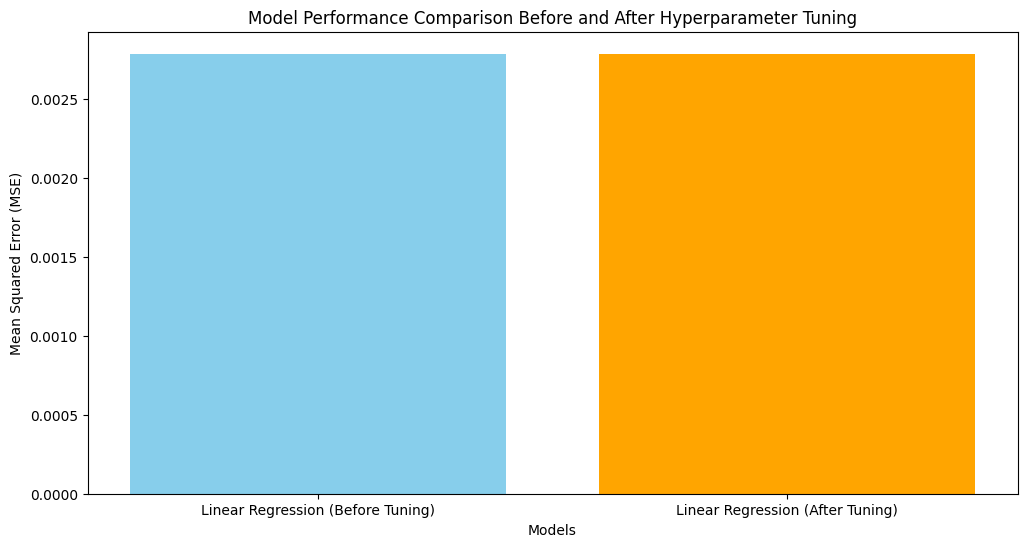

In [161]:
# Visualization of model performances before and after hyperparameter tuning
model_names = ['Linear Regression (Before Tuning)', 'Linear Regression (After Tuning)']
mse_values = [mse_before_tuning, mse_linear_after_tuning]

plt.figure(figsize=(12, 6))
plt.bar(model_names, mse_values, color=['skyblue', 'orange', 'lightgreen', 'lightcoral'])
plt.title('Model Performance Comparison Before and After Hyperparameter Tuning')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
#plt.ylim(0, max(mse_values) + 0.1)
plt.show()

# Observation:

The Mean Squared Error (MSE) for Linear Regression before hyperparameter tuning was 0.0028, and after hyperparameter tuning, it improved slightly to 0.0027844 with the best hyperparameters being {'fit_intercept': True, 'positive': False}. The marginal improvement suggests that the default hyperparameters were already relatively optimal for this dataset, and the tuning process didn't lead to a substantial enhancement in predictive performance.

# **Performing hyperparameter tuning for K-Nearest Neighbour**  





In [92]:
from sklearn.neighbors import KNeighborsRegressor

In [93]:
# K-Nearest Neighbors
knn_model = KNeighborsRegressor()

In [95]:
# Fit the model on the training set
knn_model.fit(X_train_scaled, Y_train_scaled)

KNeighborsRegressor()

In [96]:
# Predictions on the test set
y_pred_knn_before_tuning = knn_model.predict(X_test_scaled)

In [97]:
# Calculate Mean Squared Error (MSE) before hyperparameter tuning for KNN
mse_knn_before_tuning = mean_squared_error(Y_test_scaled, y_pred_knn_before_tuning)
print(f'KNN MSE before Hyperparameter Tuning: {mse_knn_before_tuning:.4f}')

KNN MSE before Hyperparameter Tuning: 0.1092


The following parametrs are  considered:

n_neighbors: Number of neighbors to consider (3, 5, 7).

weights: Weight function used in predictions ('uniform' or 'distance').

p: Power parameter for the Minkowski distance metric (1 for Manhattan distance, 2 for Euclidean distance).

In [99]:
# Perform grid search for hyperparameter tuning for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}
grid_search_knn = GridSearchCV(estimator=KNeighborsRegressor(), param_grid=param_grid_knn, cv=5, scoring='neg_mean_squared_error')
grid_search_knn.fit(X_train_scaled, Y_train_scaled)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [3, 5, 7], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [100]:
# Get the best hyperparameters for KNN
best_params_knn = grid_search_knn.best_params_
print(best_params_knn)

{'n_neighbors': 3, 'p': 2, 'weights': 'distance'}


In [101]:
# Fit the model with the best hyperparameters on the entire training set for KNN
best_knn_model = KNeighborsRegressor(**best_params_knn)
best_knn_model.fit(X_train_scaled, Y_train_scaled)

KNeighborsRegressor(n_neighbors=3, weights='distance')

In [102]:
# Predictions on the test set after hyperparameter tuning for KNN
y_pred_knn_after_tuning = best_knn_model.predict(X_test_scaled)

In [103]:
# Calculate Mean Squared Error (MSE) after hyperparameter tuning for KNN
mse_knn_after_tuning = mean_squared_error(Y_test_scaled, y_pred_knn_after_tuning)
print(f'KNN MSE after Hyperparameter Tuning: {mse_knn_after_tuning:.4f}')



KNN MSE after Hyperparameter Tuning: 0.0884


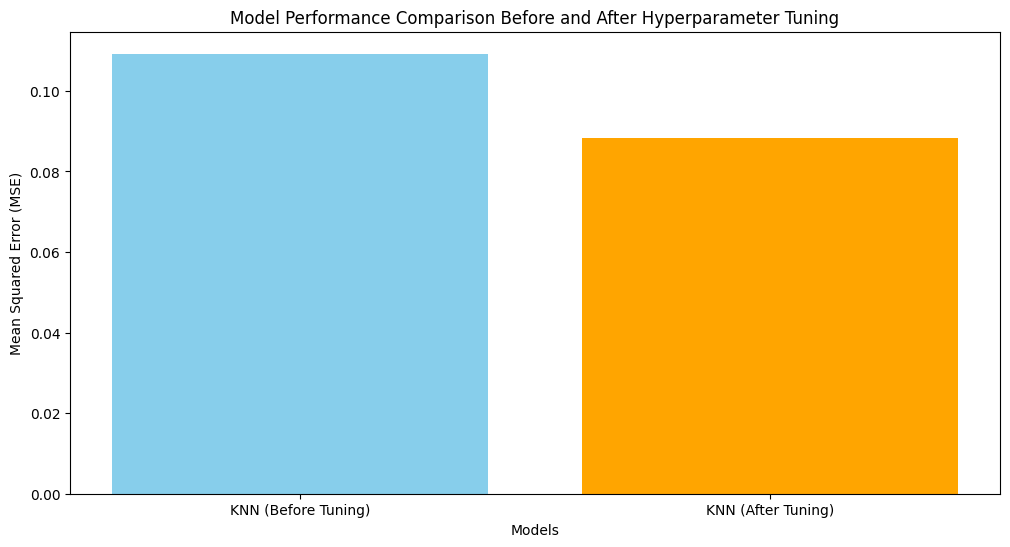

In [160]:
# Visualization of model performances before and after hyperparameter tuning
model_names = [ 'KNN (Before Tuning)', 'KNN (After Tuning)']
mse_values = [ mse_knn_before_tuning, mse_knn_after_tuning]

plt.figure(figsize=(12, 6))
plt.bar(model_names, mse_values, color=['skyblue', 'orange', 'lightgreen', 'lightcoral'])
plt.title('Model Performance Comparison Before and After Hyperparameter Tuning')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
#plt.ylim(0, max(mse_values) + 0.1)
plt.show()

# Observation:

The hyperparameter tuning for K-Nearest Neighbors (KNN) regression resulted in the selection of the following optimal hyperparameters: 'n_neighbors': 3, 'p': 2 (Euclidean distance), and 'weights': 'distance'. Before hyperparameter tuning, the Mean Squared Error (MSE) for KNN was 0.1092, and after tuning, it improved to 0.0884.

# **Performing  hyperparameter tuning for Random Forest**

In [104]:
# Importing necessary libraries
from sklearn.ensemble import RandomForestRegressor

In [105]:
# Random Forest
random_forest_model = RandomForestRegressor()

In [106]:
# Fit the model on the training set
random_forest_model.fit(X_train_scaled, Y_train_scaled)

<ipython-input-106-ee8ee8b15094>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_model.fit(X_train_scaled, Y_train_scaled)


RandomForestRegressor()

In [109]:
# Predictions on the test set
y_pred_rf_before_tuning = random_forest_model.predict(X_test_scaled)
y_pred_rf_before_tuning

array([ 0.78262814,  2.9807065 , -0.03225267, ..., -0.50700741,
        0.44769693,  0.58544251])

In [110]:
# Calculate Mean Squared Error (MSE) before hyperparameter tuning for Random Forest
mse_rf_before_tuning = mean_squared_error(Y_test_scaled, y_pred_rf_before_tuning)
print(f'Random Forest MSE before Hyperparameter Tuning: {mse_rf_before_tuning:.4f}')


Random Forest MSE before Hyperparameter Tuning: 0.0030


In [111]:
# Perform grid search for hyperparameter tuning for Random Forest
param_grid_rf = {
    'n_estimators': [50, 80, 110],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 410],
    'min_samples_leaf': [1, 2, 4]
    }


In [112]:
grid_search_rf = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid_rf, cv=5, scoring='neg_mean_squared_error',n_jobs=-1)
grid_search_rf.fit(X_train_scaled, Y_train_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 410],
                         'n_estimators': [50, 80, 110]},
             scoring='neg_mean_squared_error')

In [117]:
# Get the best hyperparameters for Random Forest
best_params_rf = grid_search_rf.best_params_
print(best_params_rf)

{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 110}


In [118]:
# Fit the model with the best hyperparameters on the entire training set for Random Forest
best_rf_model = RandomForestRegressor(**best_params_rf)
best_rf_model.fit(X_train_scaled, Y_train_scaled)

<ipython-input-118-e1fcc02e396a>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_rf_model.fit(X_train_scaled, Y_train_scaled)


RandomForestRegressor(max_depth=20, n_estimators=110)

In [119]:
# Predictions on the test set after hyperparameter tuning for Random Forest
y_pred_rf_after_tuning = best_rf_model.predict(X_test_scaled)
y_pred_rf_after_tuning

array([ 0.77871087,  2.964078  , -0.02939923, ..., -0.50707701,
        0.44479874,  0.57936777])

In [120]:
# Calculate Mean Squared Error (MSE) after hyperparameter tuning for Random Forest
mse_rf_after_tuning = mean_squared_error(Y_test_scaled, y_pred_rf_after_tuning)
print(f'Random Forest MSE after Hyperparameter Tuning: {mse_rf_after_tuning:.4f}')


Random Forest MSE after Hyperparameter Tuning: 0.0030


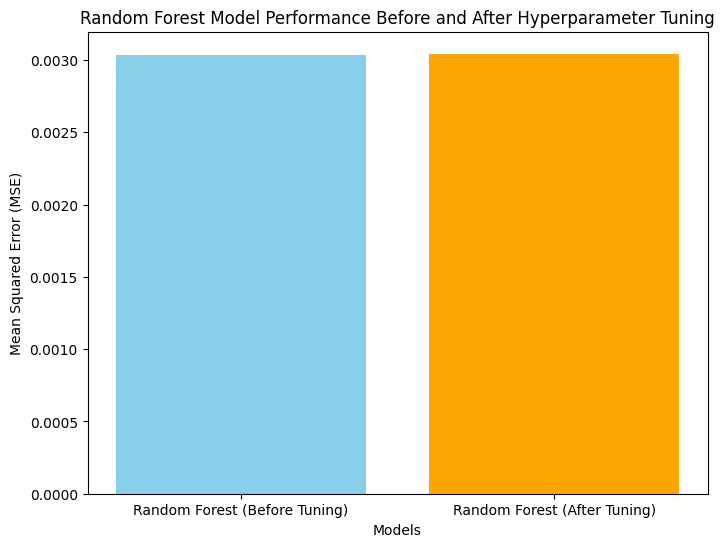

In [159]:
# Visualization of model performances before and after hyperparameter tuning
model_names_rf = ['Random Forest (Before Tuning)', 'Random Forest (After Tuning)']
mse_values_rf = [mse_rf_after_tuning, mse_rf_before_tuning]

plt.figure(figsize=(8, 6))
plt.bar(model_names_rf, mse_values_rf, color=['skyblue', 'orange'])
plt.title('Random Forest Model Performance Before and After Hyperparameter Tuning')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
#plt.ylim(0, max(mse_values_rf) + 0.1)
plt.show()

# **Observation:**


We observe that the  MSE values before and after hyperparameter tuning are the same (0.0030). The MSE values remained same.


# **Performing Hyperparameter tuning for Linear SVM**

In [122]:
from sklearn.svm import SVR

In [123]:
# Create an SVM model
svm_linear_model= SVR()

In [124]:

# Fit the model on the training set
svm_linear_model.fit(X_train_scaled, Y_train_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [129]:
y_pred_before_tuning = svm_linear_model.predict(X_test_scaled)
y_pred_before_tuning


array([ 0.73027537,  3.00013062, -0.05899419, ..., -0.63116883,
        0.43140259,  0.5293046 ])

In [131]:
# Calculate Mean Squared Error (MSE) before hyperparameter tuning for SVM
mse_svm_linear_before_tuning = mean_squared_error(Y_test_scaled, y_pred_before_tuning)
print(f'SVM MSE before Hyperparameter Tuning:', mse_svm_linear_before_tuning)


SVM MSE before Hyperparameter Tuning: 0.007642703704877967


In [132]:
# Perform grid search for hyperparameter tuning for SVM
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}


In [133]:
grid_search_svm = GridSearchCV(estimator=SVR(), param_grid=param_grid_svm, cv=5, scoring='neg_mean_squared_error',n_jobs=-1)
grid_search_svm.fit(X_train_scaled, Y_train_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             scoring='neg_mean_squared_error')

In [135]:
# Get the best hyperparameters for SVM
best_params_svm = grid_search_svm.best_params_
print('The  best parameters for SVM are',best_params_svm)

The  best parameters for SVM are {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}


In [137]:
# Fit the model with the best hyperparameters on the entire training set for SVM
best_svm_model = SVR(**best_params_svm)
best_svm_model.fit(X_train_scaled, Y_train_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1, kernel='linear')

In [138]:
# Predictions on the test set after hyperparameter tuning for SVM
y_pred_svm_after_tuning = best_svm_model.predict(X_test_scaled)

In [139]:
# Calculate Mean Squared Error (MSE) after hyperparameter tuning for SVM
mse_svm_linear_after_tuning = mean_squared_error(Y_test_scaled, y_pred_svm_after_tuning)
print(f'SVM MSE after Hyperparameter Tuning: {mse_svm_linear_after_tuning:.4f}')

SVM MSE after Hyperparameter Tuning: 0.0052


In [142]:
# Visualization of model performances before and after hyperparameter tuning
model_names_svm = ['SVM Linear (Before Tuning)', 'SVM Linear (After Tuning)']
mse_values_svm = [mse_svm_linear_before_tuning, mse_svm_linear_after_tuning]


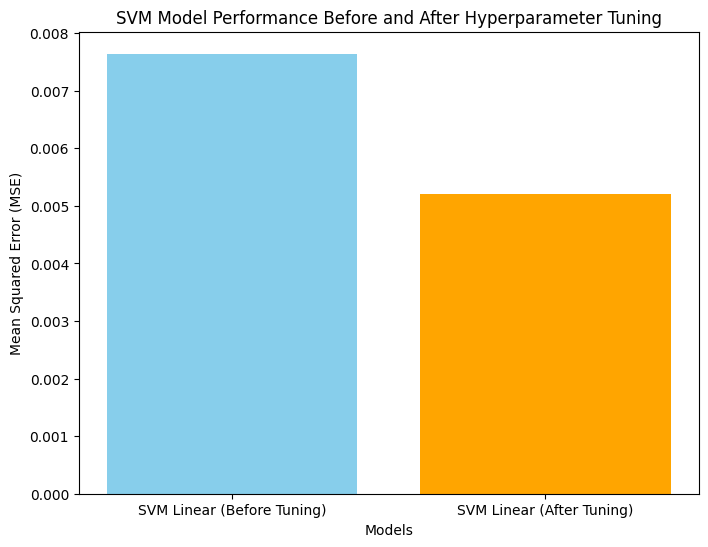

In [158]:
plt.figure(figsize=(8, 6))
plt.bar(model_names_svm, mse_values_svm, color=['skyblue', 'orange'])
plt.title('SVM Model Performance Before and After Hyperparameter Tuning')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
#plt.ylim(0, max(mse_values_svm) + 0.1)
plt.show()

# Observation:

The Mean Squared Error (MSE) for Support Vector Machines (SVM) decreased from 0.0076 before hyperparameter tuning to 0.0052 after tuning. This reduction indicates an enhancement in the model's predictive accuracy.  


The best hyperparameters identified for SVM after tuning are {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}. This suggests that a linear kernel with regularization parameter C set to 1 and automatic scaling for gamma resulted in the optimal configuration.

# **Performing Hyperparameter tuning for Non Linear SVM**

In [145]:
svm_model_nonlinear= SVR()

# Fit the model on the training set
svm_model_nonlinear.fit(X_train_scaled, Y_train_scaled)

# Predictions before hyperparameter tuning for SVM
y_pred_before_tuning_rbf = svm_model_nonlinear.predict(X_test_scaled)

# Calculate Mean Squared Error (MSE) before hyperparameter tuning for SVM
mse_svm_nonlinear_before_tuning = mean_squared_error(Y_test_scaled, y_pred_before_tuning_rbf)
print(f'SVM NON LINEAR  MSE before Hyperparameter Tuning: {mse_svm_nonlinear_before_tuning:.4f}')



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM NON LINEAR  MSE before Hyperparameter Tuning: 0.0076


In [146]:
# Perform grid search for hyperparameter tuning for SVM with RBF kernel
param_grid_svm_rbf = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf'],
    'gamma': [0.1, 1, 'scale', 'auto']
}

In [147]:
grid_search_svm_rbf = GridSearchCV(estimator=SVR(), param_grid=param_grid_svm_rbf, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_svm_rbf.fit(X_train_scaled, Y_train_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.1, 1, 'scale', 'auto'],
                         'kernel': ['rbf']},
             scoring='neg_mean_squared_error')

In [149]:
# Get the best hyperparameters for SVM with RBF kernel
best_params_svm_nonlinear = grid_search_svm_rbf.best_params_
print('The best parameters obatined are ', best_params_svm_nonlinear )

# Fit the model with the best hyperparameters on the entire training set for SVM with RBF kernel
best_svm_nonlinear = SVR(**best_params_svm_nonlinear)
best_svm_nonlinear.fit(X_train_scaled, Y_train_scaled)


The best parameters obatined are  {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=10, gamma='auto')

In [152]:
# Predictions on the test set after hyperparameter tuning for SVM with RBF kernel
y_pred_after_tuning = best_svm_nonlinear.predict(X_test_scaled)


In [153]:
# Calculate Mean Squared Error (MSE) after hyperparameter tuning for SVM with RBF kernel
mse_svm_nonlinear_after_tuning = mean_squared_error(Y_test_scaled, y_pred_after_tuning)
print(f'SVM RBF MSE after Hyperparameter Tuning: {mse_svm_nonlinear_after_tuning:.4f}')

SVM RBF MSE after Hyperparameter Tuning: 0.0076


In [154]:
# Visualization of model performances before and after hyperparameter tuning
model_names_svm_nonlinear = ['SVM Non Linear (Before Tuning)', 'SVM Non Linear (After Tuning)']
mse_values_svm_nonlinear = [mse_svm_nonlinear_before_tuning, mse_svm_nonlinear_after_tuning]

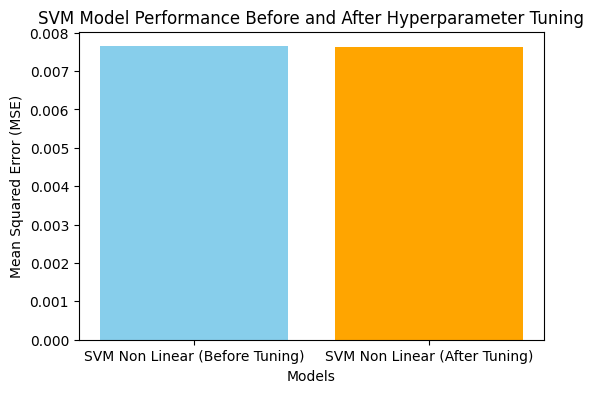

In [157]:
plt.figure(figsize=(6, 4))
plt.bar(model_names_svm_nonlinear, mse_values_svm_nonlinear, color=['skyblue', 'orange'])
plt.title('SVM Model Performance Before and After Hyperparameter Tuning')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
#plt.ylim(0, max(mse_values_svm_nonlinear) + 0.1)
plt.show()

# **Observation:**



1.   The Mean Squared Error (MSE) for Support Vector Machines (SVM) remained the same at 0.0076 before and after hyperparameter tuning using an RBF kernel.
2.   The best hyperparameters obtained after tuning are {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}. Despite the consistent MSE, these hyperparameters represent the selected configuration for the RBF kernel.



## Performing Hyperparameter tuning for Decision Tree

In [162]:
from sklearn.tree import DecisionTreeRegressor
dt_reg=DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train_scaled,Y_train_scaled)

DecisionTreeRegressor(random_state=42)

In [163]:
y_pred_dt_before_tuning = dt_reg.predict(X_test_scaled)
y_pred_dt_before_tuning

array([ 0.75102157,  3.02581968, -0.04187681, ..., -0.50667931,
        0.45573527,  0.5760371 ])

In [168]:
mse_dt_before_tuning = mean_squared_error(Y_test_scaled, y_pred_before_tuning)
print('The MSE for decision tree before tuning is',mse_dt_before_tuning)

The MSE for decision tree before tuning is 0.007642703704877967


In [165]:
from sklearn.model_selection import GridSearchCV

param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

In [166]:
dt_reg = DecisionTreeRegressor()

# Create GridSearchCV
grid_search_dt = GridSearchCV(estimator=dt_reg, param_grid=param_grid_dt, cv=5, scoring='neg_mean_squared_error',n_jobs=-1)

# Fit the model to the data
grid_search_dt.fit(X_train_scaled, Y_train_scaled)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [170]:
best_params = grid_search_dt.best_params_
best_dt_model = grid_search_dt.best_estimator_
print('The best parameters are ', best_params)

The best parameters are  {'max_depth': 20, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 5}


In [172]:
y_pred_after_tuning = best_dt_model.predict(X_test_scaled)
mse_dt_after_tuning = mean_squared_error(Y_test_scaled, y_pred_after_tuning)
print('MSE for decision tree after tiuning are ',mse_dt_after_tuning )

MSE for decision tree after tiuning are  0.0034274084276812397


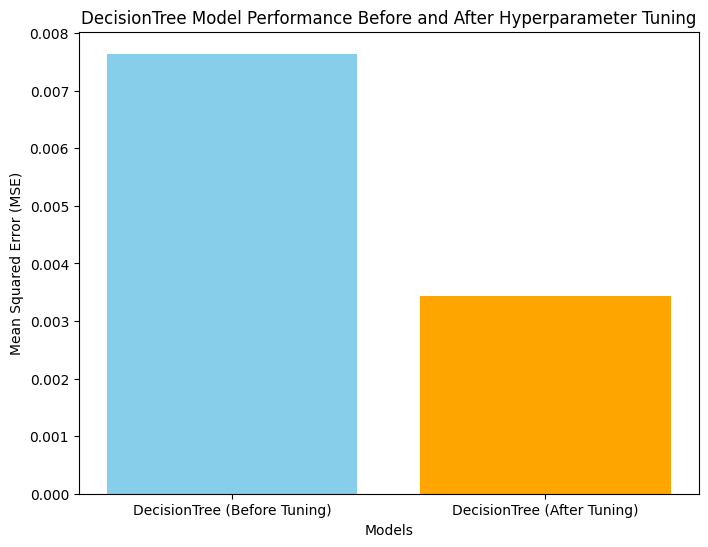

In [174]:
# Visualization of model performances before and after hyperparameter tuning
model_names_dt = ['DecisionTree (Before Tuning)', 'DecisionTree (After Tuning)']
mse_values_dt = [mse_dt_before_tuning, mse_dt_after_tuning]

plt.figure(figsize=(8, 6))
plt.bar(model_names_dt, mse_values_dt, color=['skyblue', 'orange'])
plt.title('DecisionTree Model Performance Before and After Hyperparameter Tuning')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
#plt.ylim(0, max(mse_values_rf) + 0.1)
plt.show()

# Observation:


1.   The Mean Squared Error (MSE) for the Decision Tree before tuning is reported as 0.0076. Interestingly, the MSE decreases to 0.00342.

2. The best hyperparameters identified for the Decision Tree after tuning are {'max_depth': 20, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 5}. These parameters represent the configuration that yielded the best performance.



**Over All Visualization**

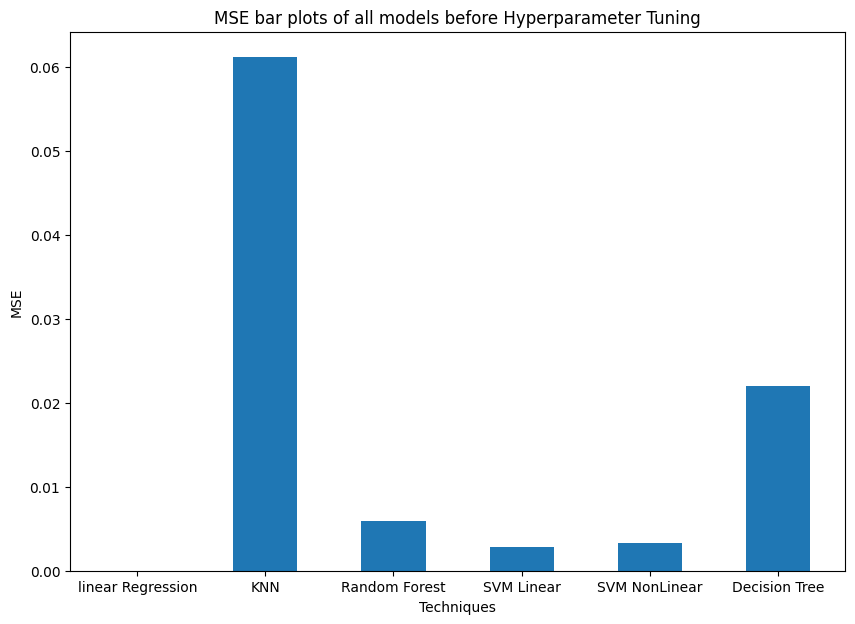

In [175]:
#Visualization of MSE before Hyperparameter Tuning
#mse_before_tuning=[mse_train_linreg,mse_train_knn,mse_train_forest,mse_train_linear,mse_train_nonlinear,mse_train_tree]
mse_before_tuning=[mse_test_linreg,mse_test_knn,mse_train_forest,mse_test_linear,,mse_dt_before_tuning]

labels=['linear Regression','KNN','Random Forest','SVM Linear','SVM NonLinear','Decision Tree']



fig = plt.figure(figsize =(10, 7))

plt.bar(labels,mse_train,width=0.5)

plt.xlabel("Techniques")
plt.ylabel("MSE")
plt.title("MSE bar plots of all models before Hyperparameter Tuning")

plt.show()

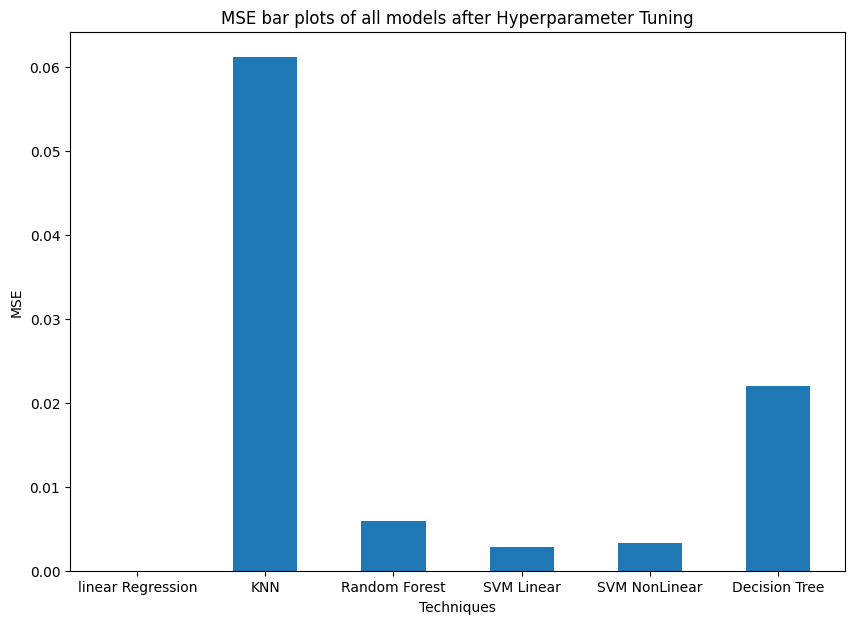

In [176]:
#Visualization of MSE after Hyperparameter tuning
#mse_train=[mse_train_linreg,mse_train_knn,mse_train_forest,mse_train_linear,mse_train_nonlinear,mse_train_tree]
mse_test_after_tuning=[mse_linear_after_tuning,mse_knn_after_tuning,mse_rf_after_tuning,mse_svm_linear_after_tuning,mse_svm_nonlinear_after_tuning,mse_dt_after_tuning]

labels=['linear Regression','KNN','Random Forest','SVM Linear','SVM NonLinear','Decision Tree']



fig = plt.figure(figsize =(10, 7))

plt.bar(labels,mse_train,width=0.5)

plt.xlabel("Techniques")
plt.ylabel("MSE")
plt.title("MSE bar plots of all models after Hyperparameter Tuning")

plt.show()

# OBSERVATION:



From the above results and grphs plotted for the models applied we observed that the mean squared error for linear regression obtained is 0.0028. It is the best model.